<a href="https://colab.research.google.com/github/beamoow/beamoow/blob/master/ProjectDSI200-WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Visualization*** 

**รายชื่อสมาชิก**
```
1. แพรวา       ประสาทไทย      6424650031 
2. อรรถโกวิท    ซู              6424650239
3. ต้นตระกูล     จันทร์แดง        6424650528
4. ปาณิสรา      วงศ์บุหลัน        6424650577 
```



 รายงานนี้เป็นส่วนหนึ่งของรายวิชา **DSI 200 (Data Visualization Using Python) การเขียนโปรแกรมเพื่อวิเคราะห์ข้อมูล (DATA ANALYTICS PROGRAMMING)** 
 ซึ่งมีความประสงค์ที่จะศึกษาทักษะภาษา python และเพื่อนำทักษะการการเขียนโปรแกรมและการวิเคราะห์ข้อมูล ผ่านข้อมูลที่อาจารย์ได้แนบมากับเนื้อหางาน 
 โดยจะนำข้อมูลมาวิเคราะห์ และจำแนก จุดประสงค์ข้อมูลของกลุ่มเราที่จะนำเสนอ ทางคณะผู้จัดทำขอขอบคุณ ดร.ศรัณย์ กุลยานนท์ ผู้ให้ความรู้ และแนวทางการศึกษาที่มีข้อมูลอันเป็นประโยชน์ต่อผู้ที่สนใจศึกษาในการเขียนโปรแกรมเป็นอย่างดี

In [ ]:
import requests                                                            
from bs4 import BeautifulSoup                                              
import matplotlib.pyplot as plt                                            
import pandas as pd                                                        

#**ตาราง**
แสดงค่าของจำนวนนักเรียนที่ลงทะเบียนรายวิชานั้นๆในแต่ละปีการศึกษา และจำนวนนักเรียนที่ทำแบบสอบถามทั้งหมด 

In [ ]:
main_url = 'https://sgulyano.github.io/eval/'                                   
html_url = ['01888961.html',                                                    
            '34765352.html',
            '59077969.html',
            '87385371.html',
            '94578503.html',
            '09934285.html',
            '35676402.html',
            '63740399.html',
            '87545994.html',
            '95850887.html',
            '16585447.html',
            '57138607.html',
            '69893123.html',
            '89244427.html',
            '98742007.html',
            '33737452.html',
            '58806234.html',
            '83499032.html',
            '90151389.html']
eval_url = [main_url + url for url in html_url]                                 

def get_table_data(item):                                                       
    data = []                                                                   
    table_body = item.find('tbody')                                             
    rows = table_body.find_all('tr')                                            
    for row in rows:                                                            
        cols = row.find_all('td')                                               
        cols = [ele.text.strip() for ele in cols]                               
        data.append([ele for ele in cols if ele])                               
    return data                                                                 

all_info = []                                                                   
all_ratings = []                                                                

for url in eval_url:                                                            
    r = requests.get(url)                                                       
    soup = BeautifulSoup(r.content, "html.parser")                              
    tables = soup.find_all("table")                                             

    all_info.append(get_table_data(tables[0]))                                  
    all_ratings.append(get_table_data(tables[2]))                               
data = (all_info, all_ratings)


def alphabet ():                                                                
    classs = []                                                                 
    point = []                                                                  
    for j in range(len(html_url)):                                              
        classs.append(data[0][j][0][1])                                         
        point.append([data[0][j][0][1], j])                                     

    test = []                                                                   
    results = []                                                                
    for check in list(dict.fromkeys(classs)):                                   
        for num, checker in enumerate(classs):                                  
            if check == checker:                                                
                test.append(point[num])                                                                                                                                   
        results.append(test) ; test = []                                        
    return results                                                              

b = alphabet()                                                                  



sb = []                                                                         
pee = []                                                                        
stu = []                                                                        
stu_ans = []                                                                    

for i in b:                                                                      
    for j in i:                                                                 
        sb.append(data[0] [j[1]] [0][1])                                        
        pee.append(data[0] [j[1]] [2][1])                                       
        stu.append(data[0] [j[1]] [4][1])                                       
        stu_ans.append(data[0] [j[1]] [5][1])                                   

number = {                                                                      
    "Subjects" : (sb),                                                          
    "Years" : (pee),                                                            
    "Student" : (stu),                                                          
    "Student(ANS)" : (stu_ans)                                                  
}


pd.DataFrame(number)                                                            

,Subjects,Years,Student,Student(ANS)
0,ryoivricfq,1/2563,44,9 (20.45%)
1,ryoivricfq,2/2561,44,7 (15.91%)
2,ryoivricfq,1/2562,50,12 (24.00%)
3,bbdfmowkmw,1/2562,43,6 (13.95%)
4,bbdfmowkmw,2/2563,41,4 (9.76%)
5,bbdfmowkmw,2/2563,44,6 (13.64%)
6,bbdfmowkmw,2/2563,45,10 (22.22%)
7,bbdfmowkmw,2/2562,50,5 (10.00%)
8,nxwvugfpvk,1/2562,501,94 (18.76%)
9,nxwvugfpvk,2/2561,326,30 (9.20%)


**สรุป** : เพื่อให้เห็นภาพรวมจำนวนนักเรียนที่ลงทะเบียนรายวิชานั้นๆในแต่ละปีการศึกษา และจำนวนนักเรียนที่ทำแบบสอบถามทั้งหมด ในแต่ละเว็บได้โดยง่าย

#**กราฟแท่ง**
แสดงจำนวนผลรวมร้อยละการประเมินความพึงพอใจระดับที่ 5 ของนักศึกษาในแต่ละส่วน สำหรับปี 2563 ซึ่งมีรายวิชา tqkcxncfqb และ bbdfmowkmw ที่มีเซคแตกต่างกัน



> รายวิชา tqkcxncfqb ที่มีเซค zwsgaqcugj และ cqfxaixhuz โดยแสดงผลรวมร้อยละการประเมินความพึงพอใจระดับที่ 5 ทั้ง 3 ส่วน



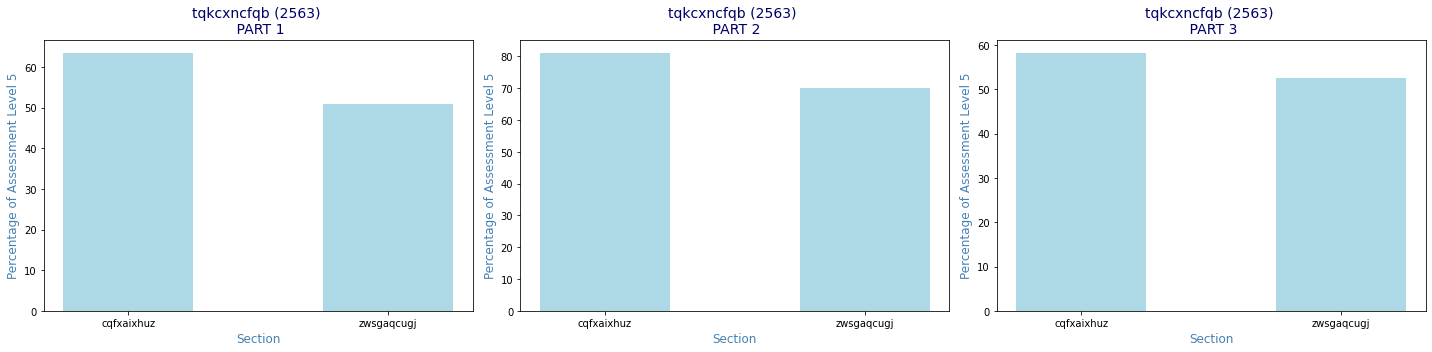

In [ ]:
w1 = []                                                                         
w2 = []                                                                         
w3 = []                                                                         
w4 = []                                                                         

for j in [7, 18]:                                                               

    w1.append(data[0] [j] [1][1])                                               
    w2.append(float(data[1] [j] [12][2]))                                       
    w3.append(float(data[1] [j] [23][2]))                                       
    w4.append(float(data[1] [j] [30][2]))                                       


fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))                                 


axes[0].set_title("tqkcxncfqb (2563) \n PART 1", color='#000066', fontsize = 14)          
axes[0].bar(w1, w2, color='#ADD8E6', width = 0.5)                                         
axes[0].set_xlabel('Section', color = '#4682B4', fontsize = 12)                           
axes[0].set_ylabel('Percentage of Assessment Level 5', color = '#4682B4', fontsize = 12)  


axes[1].set_title("tqkcxncfqb (2563) \n PART 2", color='#000066', fontsize = 14)          
axes[1].bar(w1, w3, color='#ADD8E6', width = 0.5)                                         
axes[1].set_xlabel('Section', color = '#4682B4', fontsize = 12)                           
axes[1].set_ylabel('Percentage of Assessment Level 5', color = '#4682B4', fontsize = 12)  

axes[2].set_title("tqkcxncfqb (2563) \n PART 3", color='#000066', fontsize = 14)          
axes[2].bar(w1, w4, color='#ADD8E6', width = 0.5)                                         
axes[2].set_xlabel('Section', color = '#4682B4', fontsize = 12)                           
axes[2].set_ylabel('Percentage of Assessment Level 5', color = '#4682B4', fontsize = 12)  

plt.tight_layout()                                                                        

**สรุป** : เพื่อเปรียบเทียบว่าในรายวิชา tqkcxncfqb ในปี 2563 เซคใดมีนักศึกษาชื่นชอบมากกว่ากัน โดยสังเกตจากคะแนนการประเมินความพึงพอใจจากแบบประเมินทั้ง 3 ส่วน 
ในระดับที่ 5 โดยเซค cqfxaizhuz เป็นเซคที่นักศึกษาให้คะแนนการประเมินทั้ง3 ส่วน ในระดับที่5 มากที่สุด จากแต่ละส่วนคิดเป็นร้อยละ63.54, 81.25	และ58.33 ตามลำดับ

> รายวิชา bbdfmowkmw ที่มีเซค zwsgaqcugj, gxqqnjurxb และ cqfxaixhuz โดยแสดงผลรวมร้อยละการประเมินความพึงพอใจระดับที่ 5 

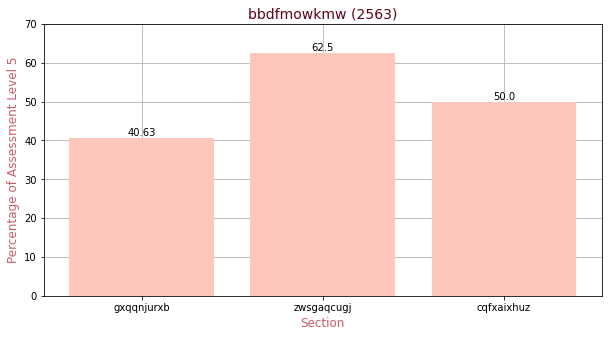

In [ ]:
g1 = []                                                                                         
g2 = []                                                                                         
g3 = []                                                                                         
g4 = []                                                                                         

for j in [6, 10, 14]:                                                                            

    g1.append(data[0] [j] [1][1])                                                              
    g2.append(float(data[1] [j] [12][2]))                                                       
        

plt.rcParams['axes.grid'] = True                                                                
plt.rcParams['axes.axisbelow'] = True                                                           
plt.rcParams['figure.figsize'] = 10,6                                                          


fig, ax = plt.subplots(figsize=(10,5))                                                         
plt.title('bbdfmowkmw (2563)', color = '#600318', fontsize = 14)                               

bars = ax.bar(x=g1, height=g2, color='#FEC7BB')                                           

plt.xlabel('Section', color = '#C85E6C', fontsize = 12)                                         
plt.ylabel('Percentage of Assessment Level 5', color = '#C85E6C', fontsize = 12)                
plt.ylim(0,70)                                                                                  
  
for bar in bars:                                                                                
    height = bar.get_height()                                                                   
    label_x_pos = bar.get_x() + bar.get_width() / 2                                             
    ax.text(label_x_pos, height, s=f'{height}', ha='center',va='bottom')                        



**สรุป** : เพื่อเปรียบเทียบว่าในรายวิชาbbdfmowkmw ในปี2563 เซคใดมีนักศึกษาชื่นชอบมากกว่ากัน โดยสังเกตจากคะแนนการประเมินความพึงพอใจระดับที่ 5 โดยเซค zwsgaqcugj มีนักศึกษาให้คะแนนการประเมินความพึงพอใจระดับที่ 5 มากที่สุด คิดเป็นร้อยละ 62.5 ตามด้วยเซค cqfxaixhuz คิดเป็นร้อยละ 50 และเซคgxqqnjurxb คิดเป็นร้อยละ 40.63

#**กราฟแท่งผสมกราฟเส้น**
รูปแบบของกราฟแท่งแสดงค่า X-bar รวมของแต่ละรายวิชา ส่วนกราฟเส้นแสดงค่า SD. รวมของแต่ละรายวิชา




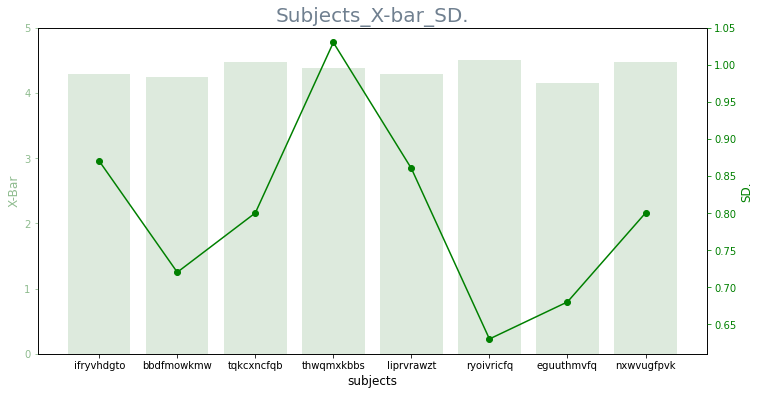

In [ ]:
dee1 = []                                                                                
dee2 = []                                                                                
dee3 = []                                                                                

for j in [3, 6, 7, 8, 11, 12, 15, 16]:                                                   
    dee1.append(data[0] [j] [0] [1])                                                     
    dee2.append(float(data[1] [j] [12] [13]))                                            
    dee3.append(float(data[1] [j] [12] [14]))                                            

plt.rcParams['axes.grid'] = False                                                        
plt.rcParams['axes.axisbelow'] = False                                                   
plt.rcParams['figure.figsize'] = 12,6                                                    

fig, ax1 = plt.subplots()                                                                                                              
ax1.set_title("Subjects_X-bar_SD.", fontsize = 20, color = '#708090')                    

ax1.bar(dee1, dee2, color = '#8FBC8F', alpha=.3)                                         
ax1.set_xlabel("subjects", color = "black", fontsize = 12)                               
ax1.set_ylabel("X-Bar", color = '#8FBC8F', fontsize = 12)                                
ax1.tick_params("y", colors = '#8FBC8F')                                                 

ax1.set_ylim(0,5)                                                                        

ax2 = ax1.twinx()                                                                        
ax2.plot(dee1, dee3, marker = "o", color = "green")                                      
ax2.set_ylabel("SD.", color = "green", fontsize = 12)                                    
ax2.tick_params("y", colors = "green")                                                   



**สรุป** : เพื่อเปรียบเทียบค่าเฉลี่ย(X-bar)รวม และค่าส่วนเบี่ยงเบนมาตรฐาน(SD.)รวม ที่ทำให้แสดงเห็นถึงการกระจายของข้อมูลในแต่ละรายวิชา โดยรายวิชา ryoivricfq มีค่าเฉลี่ยรวมมากที่สุด คิดเป็น 4.4 และรายวิชา thwqmxkbbs มีค่าส่วนเบี่ยงเบนมาตรฐานมากที่สุด คิดเป็น 1.03

#**กราฟวงกลม**
แสดงจำนวนนักศึกษาที่จดทะเบียนเรียนวิชา bbdfmowkmw ที่มีเซคแตกต่างกันจำนวน 3 เซค

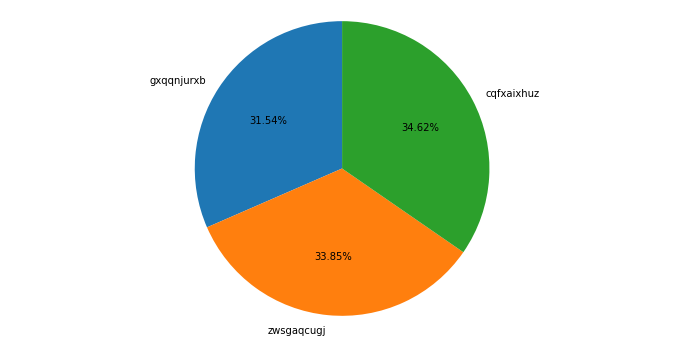

In [ ]:
k1 = []                                                                         
k2 = []                                                                         
                                                                             
for j in [6, 10, 14]:                                                           
    k1.append(data[0] [j] [1] [1])                                              
    k2.append(data[0] [j] [4] [1])                                              


def demo():                                                                     
    plt.pie(k2, labels=k1, startangle=90, autopct="%1.2f%%")                    
    plt.axis("equal")                                                           
    plt.show                                                                    
    
if __name__ == '__main__':                                                      
    demo()                                                                      



**สรุป** : เพื่อเปรียบเทียบจำนวนนักศึกษาว่าสนใจลงทะเบียนในเซคใดของรายวิชา bbdfmowkmw มากกว่ากัน โดยเซค cqfxaixhuz มีนักเรียนที่สนใจและลงทะเบียนมากที่สุด คิดเป็นร้อยละ 34.62 จากทั้ง 3 เซค

# THANK YOU